## Let's get to know the data set
This dataset is starting from February 2022 provides subway ridership estimates on an hourly basis.

The columns are as follows:

* transit_timestamp :Timestamp payment took place in local time. All transactions here are rounded down to the nearest hour. For example, a swipe that took place at 1:37pm will be reported as having taken place at 1pm.
* station_complex_id : A unique identifier for station complexes
* station_complex : The subway complex where an entry swipe or tap took place. Large subway complexes, such as Times Square and Fulton Center, may contain multiple subway lines.
* borough : Represents one of the boroughs of New York City serviced by the subway system (Bronx, Brooklyn, Manhattan, Queens).
* routes : Refers to the different subway routes that stop at a particular subway station.
* payment_method : Specifies whether the payment method used to enter was from OMNY or MetroCard.
* ridership : Total number of riders that entered a subway complex via OMNY or MetroCard at the specific hour.
* transfers : Number of individuals who entered a subway complex via a free bus-to-subway, or free out-of-network transfer. This represents a subset of total ridership, meaning that these transfers are already included in the preceding ridership column. Transfers that take place within a subway complex (e.g., individuals transferring from the 2 to the 4 train within Atlantic Avenue) are not captured here.
* latitude : Latitude for specified subway complex
* longitude : Longitude for the specified subway complex
* Georeference : Open Data platform-generated geocoding information from supplied address components. Point-type location is the centroid of the address components provided and does not reflect a specific address if the street address component is not provided.
* itsuid : Open Data-generated unique row identifier constructed from dataset columns. This column is hidden from public view.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
pd.set_option('display.colheader_justify', 'left')

In [2]:
df = pd.read_csv("/kaggle/input/mta-subway/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv", low_memory =False)
df.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,New York Zip Codes,Counties,NYS Municipal Boundaries
0,03/27/2022 06:00:00 AM,H007,1 Av (L),M,L,omny,12.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2022-03-27T06:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
1,06/05/2022 02:00:00 AM,H007,1 Av (L),M,L,omny,93.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2022-06-05T02:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
2,06/13/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,3.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-06-13T03:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
3,07/28/2023 05:00:00 AM,H007,1 Av (L),M,L,omny,31.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-07-28T05:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
4,08/08/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,3.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-08-08T03:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343943 entries, 0 to 3343942
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   transit_timestamp         object 
 1   station_complex_id        object 
 2   station_complex           object 
 3   borough                   object 
 4   routes                    object 
 5   payment_method            object 
 6   ridership                 float64
 7   transfers                 float64
 8   latitude                  float64
 9   longitude                 object 
 10  Georeference              object 
 11  itsuid                    object 
 12  New York Zip Codes        float64
 13  Counties                  float64
 14  NYS Municipal Boundaries  float64
dtypes: float64(6), object(9)
memory usage: 382.7+ MB


In [4]:
#Rename Columns
df.rename(columns={'transit_timestamp': 'TRANSIT TIME STAMP'},inplace=True)
df.rename(columns={'station_complex_id': 'STATION COMPLEX ID'},inplace=True)
df.rename(columns={'station_complex': 'STATION COMPLEX'},inplace=True)
df.rename(columns={'borough': 'BOROUGH'},inplace=True)
df.rename(columns={'routes': 'ROUTES'},inplace=True)
df.rename(columns={'payment_method': 'PAYMENT METHOD'},inplace=True)
df.rename(columns={"ridership":"RIDERSHIP"},inplace=True)
df.rename(columns={"transfers": "TRANSFERS"},inplace=True)
df.rename(columns={"latitude": "LATITUDE"},inplace=True)
df.rename(columns={"longitude": "LONGITUDE"},inplace=True)
df.rename(columns={"Georeference": "GEOREFERENCE"},inplace=True)
df.rename(columns={"itsuid": "ITSUID"},inplace=True)
df.rename(columns={"New York Zip Codes": "NEW YORK ZIP CODES"},inplace=True)
df.rename(columns={"Counties": "COUNTIES"},inplace=True)
df.rename(columns={"NYS Municipal Boundaries": "NYS MUNICIPAL BOUNDARIES"},inplace=True)
df.head(10)

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,ROUTES,PAYMENT METHOD,RIDERSHIP,TRANSFERS,LATITUDE,LONGITUDE,GEOREFERENCE,ITSUID,NEW YORK ZIP CODES,COUNTIES,NYS MUNICIPAL BOUNDARIES
0,03/27/2022 06:00:00 AM,H007,1 Av (L),M,L,omny,12.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2022-03-27T06:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
1,06/05/2022 02:00:00 AM,H007,1 Av (L),M,L,omny,93.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2022-06-05T02:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
2,06/13/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,3.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-06-13T03:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
3,07/28/2023 05:00:00 AM,H007,1 Av (L),M,L,omny,31.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-07-28T05:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
4,08/08/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,3.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-08-08T03:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
5,08/26/2023 05:00:00 AM,H007,1 Av (L),M,L,omny,23.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-08-26T05:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0
6,02/10/2022 11:00:00 AM,R170,103 St (1),M,1,omny,82.0,0.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),2022-02-10T11:00:00R170103 St (1)M1omny,752.0,2095.0,749.0
7,02/27/2022 05:00:00 AM,R170,103 St (1),M,1,omny,2.0,0.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),2022-02-27T05:00:00R170103 St (1)M1omny,752.0,2095.0,749.0
8,03/18/2022 05:00:00 AM,R170,103 St (1),M,1,omny,5.0,0.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),2022-03-18T05:00:00R170103 St (1)M1omny,752.0,2095.0,749.0
9,03/18/2022 11:00:00 PM,R170,103 St (1),M,1,omny,36.0,0.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),2022-03-18T23:00:00R170103 St (1)M1omny,752.0,2095.0,749.0


In [5]:
df.dtypes

TRANSIT TIME STAMP           object
STATION COMPLEX ID           object
STATION COMPLEX              object
BOROUGH                      object
ROUTES                       object
PAYMENT METHOD               object
RIDERSHIP                   float64
TRANSFERS                   float64
LATITUDE                    float64
LONGITUDE                    object
GEOREFERENCE                 object
ITSUID                       object
NEW YORK ZIP CODES          float64
COUNTIES                    float64
NYS MUNICIPAL BOUNDARIES    float64
dtype: object

In [6]:
df["TRANSIT TIME STAMP"] = pd.to_datetime(df['TRANSIT TIME STAMP'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce') 
df['MONTH'] = df['TRANSIT TIME STAMP'].dt.month
df['MONTHS'] = df['TRANSIT TIME STAMP'].dt.strftime('%B')
df['TIME'] = df['TRANSIT TIME STAMP'].dt.time
df['YEAR'] = df['TRANSIT TIME STAMP'].dt.year
df.dtypes

TRANSIT TIME STAMP          datetime64[ns]
STATION COMPLEX ID                  object
STATION COMPLEX                     object
BOROUGH                             object
ROUTES                              object
PAYMENT METHOD                      object
RIDERSHIP                          float64
TRANSFERS                          float64
LATITUDE                           float64
LONGITUDE                           object
GEOREFERENCE                        object
ITSUID                              object
NEW YORK ZIP CODES                 float64
COUNTIES                           float64
NYS MUNICIPAL BOUNDARIES           float64
MONTH                              float64
MONTHS                              object
TIME                                object
YEAR                               float64
dtype: object

In [7]:
df.head()

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,ROUTES,PAYMENT METHOD,RIDERSHIP,TRANSFERS,LATITUDE,LONGITUDE,GEOREFERENCE,ITSUID,NEW YORK ZIP CODES,COUNTIES,NYS MUNICIPAL BOUNDARIES,MONTH,MONTHS,TIME,YEAR
0,2022-03-27 06:00:00,H007,1 Av (L),M,L,omny,12.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2022-03-27T06:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0,3.0,March,06:00:00,2022.0
1,2022-06-05 02:00:00,H007,1 Av (L),M,L,omny,93.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2022-06-05T02:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0,6.0,June,02:00:00,2022.0
2,2023-06-13 03:00:00,H007,1 Av (L),M,L,omny,3.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-06-13T03:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0,6.0,June,03:00:00,2023.0
3,2023-07-28 05:00:00,H007,1 Av (L),M,L,omny,31.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-07-28T05:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0,7.0,July,05:00:00,2023.0
4,2023-08-08 03:00:00,H007,1 Av (L),M,L,omny,3.0,0.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),2023-08-08T03:00:00H0071 Av (L)MLomny,724.0,2095.0,749.0,8.0,August,03:00:00,2023.0


In [8]:
df.isna().sum()

TRANSIT TIME STAMP              4
STATION COMPLEX ID              4
STATION COMPLEX                 4
BOROUGH                         4
ROUTES                          4
PAYMENT METHOD                  4
RIDERSHIP                       4
TRANSFERS                       4
LATITUDE                        4
LONGITUDE                       4
GEOREFERENCE                    5
ITSUID                          5
NEW YORK ZIP CODES          54499
COUNTIES                        5
NYS MUNICIPAL BOUNDARIES        5
MONTH                           4
MONTHS                          4
TIME                            4
YEAR                            4
dtype: int64

In [9]:
df = df.dropna(subset=['YEAR']) 
df['YEAR'] = df['YEAR'].astype(int)
df.dtypes

TRANSIT TIME STAMP          datetime64[ns]
STATION COMPLEX ID                  object
STATION COMPLEX                     object
BOROUGH                             object
ROUTES                              object
PAYMENT METHOD                      object
RIDERSHIP                          float64
TRANSFERS                          float64
LATITUDE                           float64
LONGITUDE                           object
GEOREFERENCE                        object
ITSUID                              object
NEW YORK ZIP CODES                 float64
COUNTIES                           float64
NYS MUNICIPAL BOUNDARIES           float64
MONTH                              float64
MONTHS                              object
TIME                                object
YEAR                                 int64
dtype: object

In [10]:
df.duplicated().sum()

0

In [11]:
new_df = df[["TRANSIT TIME STAMP","STATION COMPLEX ID","STATION COMPLEX","BOROUGH","RIDERSHIP","LATITUDE","LONGITUDE","GEOREFERENCE","MONTHS","YEAR","TIME"]]
new_df.head()

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,RIDERSHIP,LATITUDE,LONGITUDE,GEOREFERENCE,MONTHS,YEAR,TIME
0,2022-03-27 06:00:00,H007,1 Av (L),M,12.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),March,2022,06:00:00
1,2022-06-05 02:00:00,H007,1 Av (L),M,93.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2022,02:00:00
2,2023-06-13 03:00:00,H007,1 Av (L),M,3.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2023,03:00:00
3,2023-07-28 05:00:00,H007,1 Av (L),M,31.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),July,2023,05:00:00
4,2023-08-08 03:00:00,H007,1 Av (L),M,3.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),August,2023,03:00:00


In [12]:
new_df.isna().sum()

TRANSIT TIME STAMP    0
STATION COMPLEX ID    0
STATION COMPLEX       0
BOROUGH               0
RIDERSHIP             0
LATITUDE              0
LONGITUDE             0
GEOREFERENCE          1
MONTHS                0
YEAR                  0
TIME                  0
dtype: int64

In [13]:
new_df.shape

(3343939, 11)

In [14]:
new_df.dropna(subset=["GEOREFERENCE"], inplace=True)

/tmp/ipykernel_33/3577336213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=["GEOREFERENCE"], inplace=True)


In [15]:
new_df.shape

(3343938, 11)

In [16]:
filtered_df = new_df[df['MONTHS'].isin(['June', 'July', 'August'])].reset_index(drop=True) #Filtered according to the summer months
filtered_df.head()

/tmp/ipykernel_33/440324897.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = new_df[df['MONTHS'].isin(['June', 'July', 'August'])].reset_index(drop=True) #Filtered according to the summer months


,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,RIDERSHIP,LATITUDE,LONGITUDE,GEOREFERENCE,MONTHS,YEAR,TIME
0,2022-06-05 02:00:00,H007,1 Av (L),M,93.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2022,02:00:00
1,2023-06-13 03:00:00,H007,1 Av (L),M,3.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2023,03:00:00
2,2023-07-28 05:00:00,H007,1 Av (L),M,31.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),July,2023,05:00:00
3,2023-08-08 03:00:00,H007,1 Av (L),M,3.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),August,2023,03:00:00
4,2023-08-26 05:00:00,H007,1 Av (L),M,23.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),August,2023,05:00:00


In [17]:
borough_dict = {
    'M': 'Manhattan',
    'BK': 'Brooklyn',
    'BX': 'Bronx',
    'Q': 'Queens',
}

In [18]:
filtered_df.BOROUGH.map(borough_dict)

0          Manhattan
1          Manhattan
2          Manhattan
3          Manhattan
4          Manhattan
             ...    
1029605     Brooklyn
1029606     Brooklyn
1029607     Brooklyn
1029608     Brooklyn
1029609     Brooklyn
Name: BOROUGH, Length: 1029610, dtype: object

In [19]:
filtered_df["BOROUGH"] = filtered_df.BOROUGH.map(borough_dict)

In [20]:
filtered_df.head()

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,RIDERSHIP,LATITUDE,LONGITUDE,GEOREFERENCE,MONTHS,YEAR,TIME
0,2022-06-05 02:00:00,H007,1 Av (L),Manhattan,93.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2022,02:00:00
1,2023-06-13 03:00:00,H007,1 Av (L),Manhattan,3.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2023,03:00:00
2,2023-07-28 05:00:00,H007,1 Av (L),Manhattan,31.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),July,2023,05:00:00
3,2023-08-08 03:00:00,H007,1 Av (L),Manhattan,3.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),August,2023,03:00:00
4,2023-08-26 05:00:00,H007,1 Av (L),Manhattan,23.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),August,2023,05:00:00


In [21]:
filtered_df.isna().sum()

TRANSIT TIME STAMP    0
STATION COMPLEX ID    0
STATION COMPLEX       0
BOROUGH               0
RIDERSHIP             0
LATITUDE              0
LONGITUDE             0
GEOREFERENCE          0
MONTHS                0
YEAR                  0
TIME                  0
dtype: int64

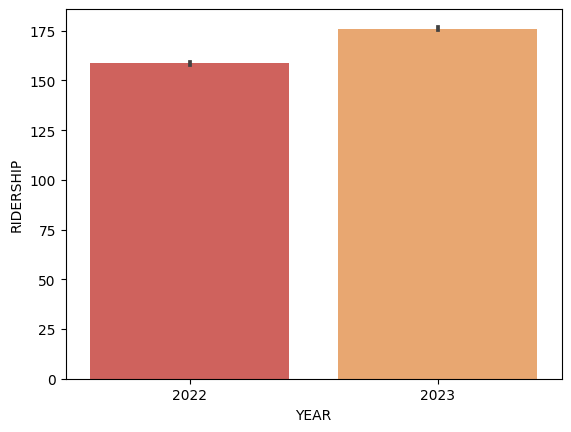

In [22]:
sns.barplot(x="YEAR", y="RIDERSHIP",data =filtered_df,palette = sns.color_palette("Spectral"))
#plt.savefig(r'C:\Users\ASUS\OneDrive\Resimler\graph1.jpg', dpi=300)

In [23]:
filter_2022 = filtered_df[(filtered_df['YEAR'] == 2022)]
filter_2023 = filtered_df[(filtered_df['YEAR'] == 2023)]
filter_2022.head()

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,RIDERSHIP,LATITUDE,LONGITUDE,GEOREFERENCE,MONTHS,YEAR,TIME
0,2022-06-05 02:00:00,H007,1 Av (L),Manhattan,93.0,40.731,-73.98162841796875,POINT (-73.98162841796875 40.730953216552734),June,2022,02:00:00
5,2022-06-05 13:00:00,R170,103 St (1),Manhattan,158.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),June,2022,13:00:00
6,2022-06-06 08:00:00,R170,103 St (1),Manhattan,315.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),June,2022,08:00:00
7,2022-07-03 10:00:00,R170,103 St (1),Manhattan,130.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),July,2022,10:00:00
8,2022-07-18 07:00:00,R170,103 St (1),Manhattan,132.0,40.799,-73.96837615966797,POINT (-73.96837615966797 40.79944610595703),July,2022,07:00:00


In [24]:
#Top 20 stations with the highest number of passenger arrivals in 2022;
top_stations2022 = filter_2022.sort_values("RIDERSHIP",ascending = False).reset_index(drop=True)
top_stations2022.head(20)

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,RIDERSHIP,LATITUDE,LONGITUDE,GEOREFERENCE,MONTHS,YEAR,TIME
0,2022-06-01 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,6149.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
1,2022-06-15 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,6076.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
2,2022-06-14 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,6043.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
3,2022-06-07 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,6001.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
4,2022-06-21 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,5987.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
5,2022-06-08 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,5869.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
6,2022-06-01 17:00:00,N500,"47-50 Sts-Rockefeller Center (B,D,F,M)",Manhattan,5865.0,40.759,-73.98133087158203,POINT (-73.98133087158203 40.758663177490234),June,2022,17:00:00
7,2022-06-22 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,5847.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
8,2022-06-23 17:00:00,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,5778.0,40.750,-73.98782348632812,POINT (-73.98782348632812 40.749717712402344),June,2022,17:00:00
9,2022-07-16 22:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,5707.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),July,2022,22:00:00


In [25]:
#Top 20 stations with the highest number of passenger arrivals in 2023;
top_stations2023 = filter_2023.sort_values("RIDERSHIP",ascending = False).reset_index(drop=True)
top_stations2023.head(10)

,TRANSIT TIME STAMP,STATION COMPLEX ID,STATION COMPLEX,BOROUGH,RIDERSHIP,LATITUDE,LONGITUDE,GEOREFERENCE,MONTHS,YEAR,TIME
0,2023-08-12 23:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,12525.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),August,2023,23:00:00
1,2023-08-13 23:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,11016.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),August,2023,23:00:00
2,2023-07-07 21:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,8899.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),July,2023,21:00:00
3,2023-06-20 21:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,7607.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),June,2023,21:00:00
4,2023-06-09 21:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,7400.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),June,2023,21:00:00
5,2023-07-21 21:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,7145.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),July,2023,21:00:00
6,2023-07-31 21:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,6999.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),July,2023,21:00:00
7,2023-06-21 21:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,6992.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),June,2023,21:00:00
8,2023-08-03 22:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,6879.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),August,2023,22:00:00
9,2023-07-03 22:00:00,N203,"161 St-Yankee Stadium (B,D,4)",Bronx,6732.0,40.828,-73.92565155029297,POINT (-73.92565155029297 40.82799530029297),July,2023,22:00:00


In [26]:
top_stations2022.dtypes

TRANSIT TIME STAMP    datetime64[ns]
STATION COMPLEX ID            object
STATION COMPLEX               object
BOROUGH                       object
RIDERSHIP                    float64
LATITUDE                     float64
LONGITUDE                     object
GEOREFERENCE                  object
MONTHS                        object
YEAR                           int64
TIME                          object
dtype: object

In [27]:
top_stations2023.dtypes

TRANSIT TIME STAMP    datetime64[ns]
STATION COMPLEX ID            object
STATION COMPLEX               object
BOROUGH                       object
RIDERSHIP                    float64
LATITUDE                     float64
LONGITUDE                     object
GEOREFERENCE                  object
MONTHS                        object
YEAR                           int64
TIME                          object
dtype: object

In [28]:
top_stations2023['TRANSIT TIME STAMP'] = pd.to_datetime(top_stations2023['TRANSIT TIME STAMP'])

top_stations2023['DAY_OF_MONTH'] = top_stations2023['TRANSIT TIME STAMP'].dt.day

top_stations2022['TRANSIT TIME STAMP'] = pd.to_datetime(top_stations2022['TRANSIT TIME STAMP'])

top_stations2022['DAY_OF_MONTH'] = top_stations2022['TRANSIT TIME STAMP'].dt.day

/tmp/ipykernel_33/581468765.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['RIDERSHIP_PERCENT'] = (data_2022['RIDERSHIP'] / data_2022['RIDERSHIP'].sum()) * 100
/tmp/ipykernel_33/581468765.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['RIDERSHIP_PERCENT'] = (data_2023['RIDERSHIP'] / data_2023['RIDERSHIP'].sum()) * 100


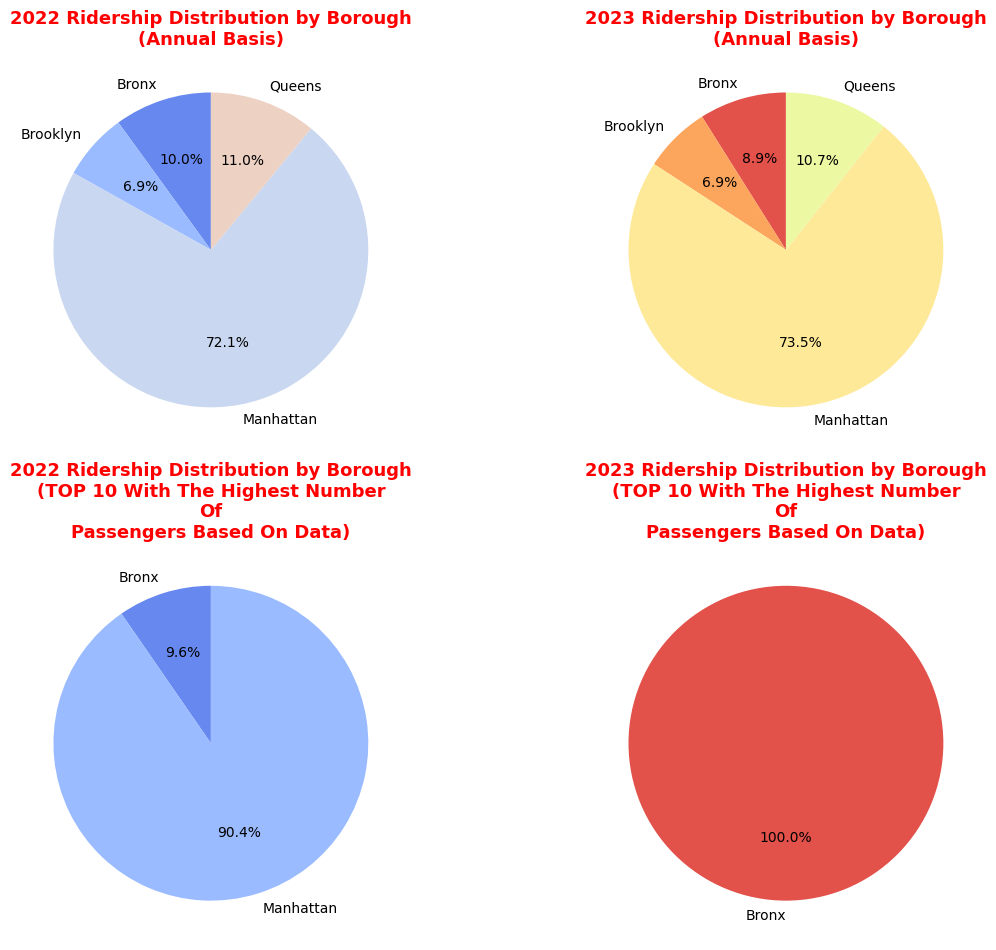

In [29]:

data_2022 = top_stations2022.head(10)
data_2023 = top_stations2023.head(10)

# Magnification factor for Subplot Plot
scale_factor = 2

# 2022 Distribution of Passenger Number by Districts (with ½ ratio)
plt.subplot(2, 2, 1)
top_stations2022['RIDERSHIP_PERCENT'] = (top_stations2022['RIDERSHIP'] / top_stations2022['RIDERSHIP'].sum()) * 100
data_2022_grouped = top_stations2022.groupby('BOROUGH')['RIDERSHIP_PERCENT'].sum()
plt.pie(data_2022_grouped, labels=data_2022_grouped.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette("coolwarm"))
plt.title('2022 Ridership Distribution by Borough\n(Annual Basis)',fontsize = 13, weight = 'bold',color = "red")


# 2023 Distribution of Passenger Number by Districts (with ½ ratio)
plt.subplot(2, 2, 2)
top_stations2023['RIDERSHIP_PERCENT'] = (top_stations2023['RIDERSHIP'] / top_stations2023['RIDERSHIP'].sum()) * 100
data_2023_grouped = top_stations2023.groupby('BOROUGH')['RIDERSHIP_PERCENT'].sum()
plt.pie(data_2023_grouped, labels=data_2023_grouped.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette("Spectral"))
plt.title('2023 Ridership Distribution by Borough\n(Annual Basis)',fontsize = 13, weight = 'bold',color = "red")

# 2022 Distribution of Ridership by Districts (TOP 10 PROVINCIES WITH THE HIGHEST RIDERSHIP ACCORDING TO DATA)
plt.subplot(2, 2, 3)
data_2022['RIDERSHIP_PERCENT'] = (data_2022['RIDERSHIP'] / data_2022['RIDERSHIP'].sum()) * 100
data_2022_grouped = data_2022.groupby('BOROUGH')['RIDERSHIP_PERCENT'].sum()
plt.pie(data_2022_grouped, labels=data_2022_grouped.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette("coolwarm"))
plt.title('2022 Ridership Distribution by Borough\n(TOP 10 With The Highest Number\nOf\nPassengers Based On Data)',fontsize = 13, weight = 'bold',color = "red")

# 2023 Distribution of Ridership by Districts (TOP 10 PROVINCIES WITH THE HIGHEST RIDERSHIP ACCORDING TO DATA)
plt.subplot(2, 2, 4)
data_2023['RIDERSHIP_PERCENT'] = (data_2023['RIDERSHIP'] / data_2023['RIDERSHIP'].sum()) * 100
data_2023_grouped = data_2023.groupby('BOROUGH')['RIDERSHIP_PERCENT'].sum()
plt.pie(data_2023_grouped, labels=data_2023_grouped.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Spectral"))
plt.title("2023 Ridership Distribution by Borough\n(TOP 10 With The Highest Number\nOf\nPassengers Based On Data)",fontsize = 13, weight = 'bold',color = "red")

# Dimension the chart
fig = plt.gcf()
fig.set_size_inches(fig.get_size_inches() * scale_factor)

# Save
#plt.savefig(r'C:\Users\ASUS\OneDrive\Resimler\graph2.jpg', dpi=300) # 'grafik2.jpg' adında bir dosya oluşturur ve grafiği kaydeder

# Show
plt.tight_layout()
plt.show()


/tmp/ipykernel_33/2742193858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['DATETIME'] = pd.to_datetime(data_2022['DAY_OF_MONTH'].astype(str) + '-' + data_2022['TIME'].astype(str), format='%d-%H:%M:%S')
/tmp/ipykernel_33/2742193858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['DATETIME'] = pd.to_datetime(data_2023['DAY_OF_MONTH'].astype(str) + '-' + data_2023['TIME'].astype(str), format='%d-%H:%M:%S')


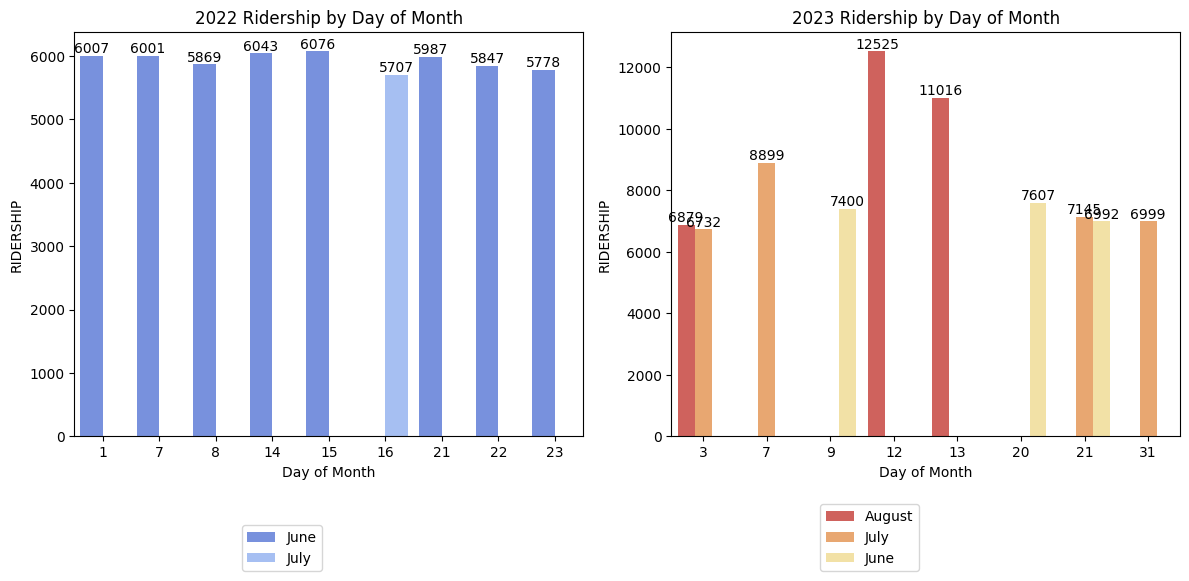

<Figure size 640x480 with 0 Axes>

In [30]:
#TO SHOW THE TOP 10 ROWS WITH THE MOST ENTRIES FOR THE YEARS 2023 AND 2022 AS DAYS AND MONTHS IN THE GRAPH;

data_2022['DATETIME'] = pd.to_datetime(data_2022['DAY_OF_MONTH'].astype(str) + '-' + data_2022['TIME'].astype(str), format='%d-%H:%M:%S')
data_2023['DATETIME'] = pd.to_datetime(data_2023['DAY_OF_MONTH'].astype(str) + '-' + data_2023['TIME'].astype(str), format='%d-%H:%M:%S')

# Making subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 satır, 2 sütunlu bir figür

# First Graph (2022)
sns.barplot(x="DAY_OF_MONTH", y="RIDERSHIP", data=data_2022, hue="MONTHS", ax=axes[0], errorbar=None, palette=sns.color_palette("coolwarm"))
axes[0].set_title('2022 Ridership by Day of Month')
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('RIDERSHIP')

# Second Graph (2023)
sns.barplot(x="DAY_OF_MONTH", y="RIDERSHIP", data=data_2023, hue="MONTHS", ax=axes[1], errorbar=None, palette=sns.color_palette("Spectral"))
axes[1].set_title('2023 Ridership by Day of Month')
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('RIDERSHIP')

# Adding numbers on the bars
for i, data in enumerate([data_2022, data_2023]):
    ax = axes[i]
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), ".0f"), 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha="center", va="bottom")

plt.tight_layout()  # Adjusts the spacing between graphs

# Her grafik için etiketlerin yerini x ekseninin altına taşıma işlemi
axes[0].legend(loc='lower right',bbox_to_anchor=(0.5, -0.35))
axes[1].legend(loc='lower right',bbox_to_anchor=(0.5, -0.35))

# Show and save
plt.show()

#plt.savefig(r'C:\Users\ASUS\OneDrive\Resimler\graph3.jpg', dpi=300)

/tmp/ipykernel_33/2390973574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['MONTH'] = data_2022['MONTHS'] + ' ' + data_2022['DAY_OF_MONTH'].astype(str)
/tmp/ipykernel_33/2390973574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['MONTH'] = data_2023['MONTHS'] + ' ' + data_2023['DAY_OF_MONTH'].astype(str)


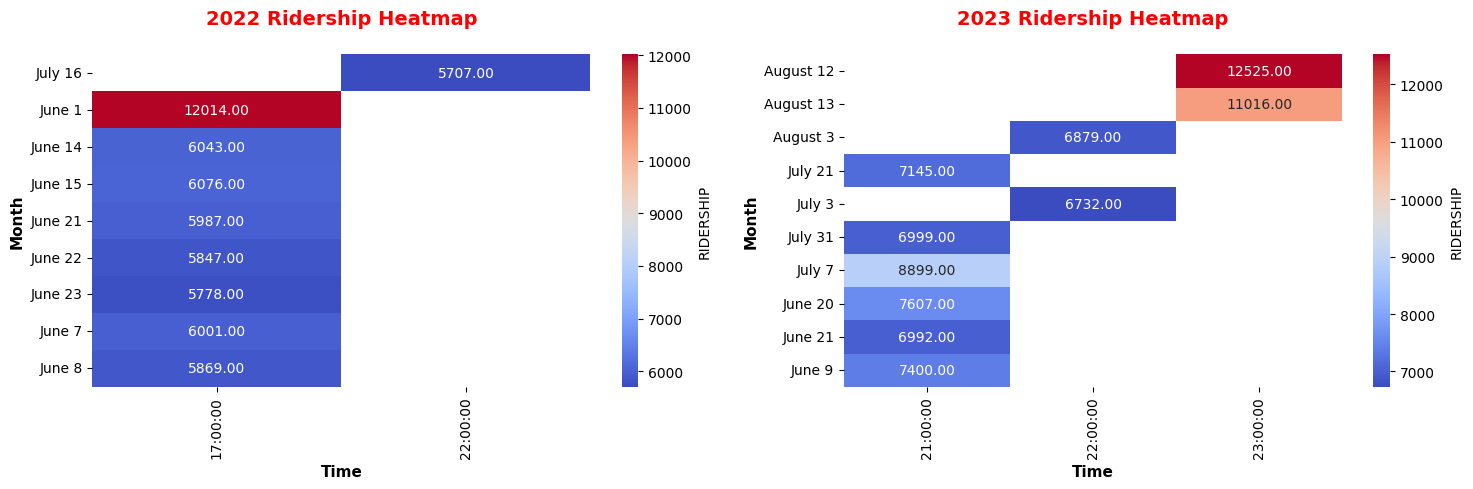

<Figure size 640x480 with 0 Axes>

In [31]:
#Defining a new MONTH column to show Day and Month together in the chart
data_2022['MONTH'] = data_2022['MONTHS'] + ' ' + data_2022['DAY_OF_MONTH'].astype(str)
data_2023['MONTH'] = data_2023['MONTHS'] + ' ' + data_2023['DAY_OF_MONTH'].astype(str)

# Creating the data frame with daily passenger counts
data_2022_pivot = data_2022.pivot_table(index='MONTH', columns='TIME', values='RIDERSHIP', aggfunc='sum')
data_2023_pivot = data_2023.pivot_table(index='MONTH', columns='TIME', values='RIDERSHIP', aggfunc='sum')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First Heatmap (2022)
sns.heatmap(data_2022_pivot, cmap='coolwarm', ax=axes[0], annot=True, fmt='.2f', cbar_kws={'label': 'RIDERSHIP'})
axes[0].set_title('2022 Ridership Heatmap\n', fontsize=14, weight='bold', color='red')
axes[0].set_xlabel('Time', fontsize=11, weight='bold')
axes[0].set_ylabel('Month', fontsize=11, weight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Second Heatmap (2023)
sns.heatmap(data_2023_pivot, cmap='coolwarm', ax=axes[1], annot=True, fmt='.2f', cbar_kws={'label': 'RIDERSHIP'})
axes[1].set_title('2023 Ridership Heatmap\n', fontsize=14, weight='bold', color='red')
axes[1].set_xlabel('Time', fontsize=11, weight='bold')
axes[1].set_ylabel('Month', fontsize=11, weight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Show and Save
plt.tight_layout()
plt.show()
#plt.savefig(r'C:\Users\ASUS\OneDrive\Resimler\graph4.jpg', dpi=300)

## BİLET DAĞITIMI İÇİN EN UYGUN;
* DAY: 12 AUGUST 2023
* HOUR: 23:00:00
* STATION COMPLEX ID:N203
* STATION COMPLEX: 161 St-Yankee Stadium (B,D,4)
* BOROUGH: BRONX
* RIDERSHIP:12525.0
* LATITUDE: 40.828
* LONGITUDE:-73.92565155029297
* GEOREFERENCE:POINT (-73.92565155029297 40.82799530029297)